## EDA - Exploratory Data Analysis of drug_review data

In [1]:
# =====================
# 1. Imports
# =====================
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

/home/sandra/drug-review-sentiment/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
path = kagglehub.dataset_download("oladayoowoeye/drug-review-prediction-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /home/sandra/.cache/kagglehub/datasets/oladayoowoeye/drug-review-prediction-sentiment-analysis/versions/1


In [3]:
# ===========================
# 2. Load Data
# ===========================
# 2. Load Data
# Adjust the path to where your file is stored
test = pd.read_csv(os.path.join("..", "data", "drugsComTest_raw.tsv"), sep="\t")
train = pd.read_csv(os.path.join("..", "data", "drugsComTrain_raw.tsv"), sep="\t")
df = pd.concat([train, test], ignore_index=True)
# train
print("Dataset train shape:", train.shape)
print("Columns:", train.columns.tolist())
train.head()	


# test
print("Dataset test shape:", test.shape)
print("Columns:", test.columns.tolist())
test.head()



Dataset train shape: (161297, 7)
Columns: ['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']
Dataset test shape: (53766, 7)
Columns: ['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [4]:
print(f"Missing values in train set:\n{train.isnull().sum()}")

print(f"Missing values in test set:\n{test.isnull().sum()}")

Missing values in train set:
Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64
Missing values in test set:
Unnamed: 0       0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


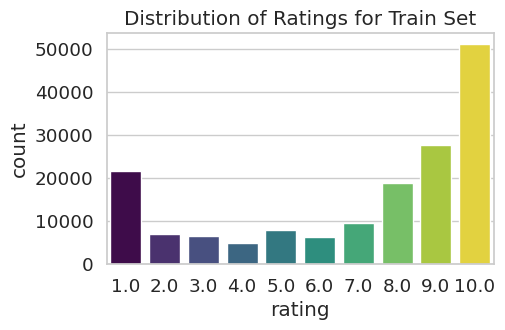

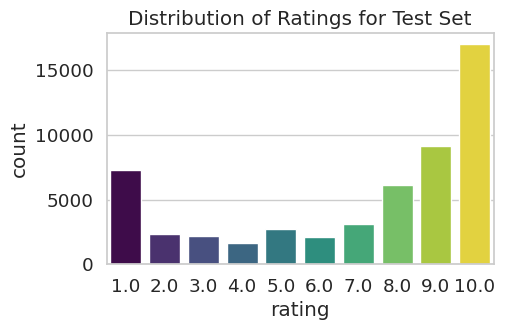

In [5]:
def ratings(dt):
	plt.figure(figsize=(5,3))
	sns.countplot(x="rating", data=dt, palette="viridis", hue="rating", order=sorted(dt['rating'].unique()), legend=False)
	plt.title(f"Distribution of Ratings for {'Train' if dt.equals(train) else 'Test'} Set")
	plt.show()

ratings(train)
ratings(test)

Percentage of positive reviews: 70.19%


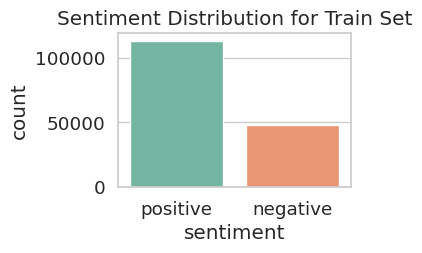

Percentage of positive reviews: 69.86%


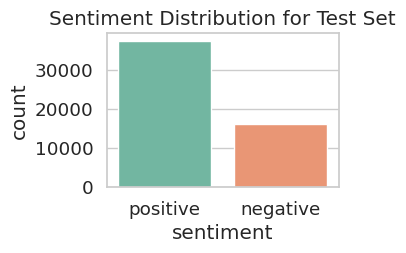

Percentage of positive reviews: 70.1%


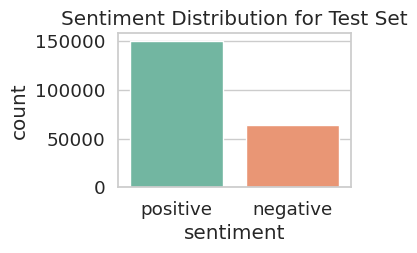

In [6]:
def classify_sentiment(df):
	df["sentiment"] = df["rating"].apply(lambda x: "positive" if x > 5 else "negative")
	print(f"Percentage of positive reviews: {(df["sentiment"] == "positive").mean().round(4) * 100}%")
	plt.figure(figsize=(3,2))
	sns.countplot(x="sentiment", data=df, palette="Set2", hue="sentiment", 
			   order=["positive", "negative"], legend=False)
	plt.title("Sentiment Distribution for " + ("Train" if df.equals(train) else "Test") + " Set")
	
	plt.show()

classify_sentiment(train)
classify_sentiment(test)
classify_sentiment(df)

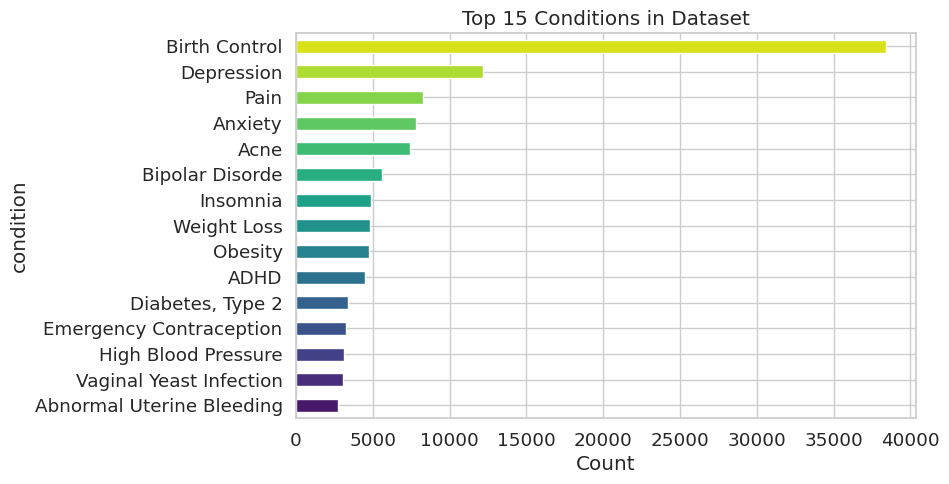

In [7]:
plt.figure(figsize=(8,5))
df["condition"].value_counts().nlargest(15).sort_values().plot(kind="barh", color=sns.color_palette("viridis", 15))
plt.title("Top 15 Conditions in Dataset")
plt.xlabel("Count")
plt.show()

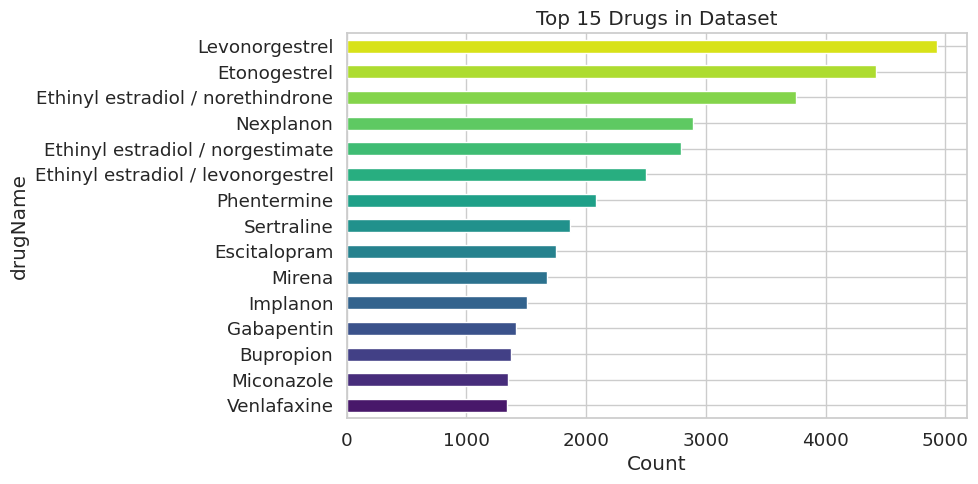

In [8]:
plt.figure(figsize=(8,5))
df["drugName"].value_counts().nlargest(15).sort_values().plot(kind="barh", color=sns.color_palette("viridis", 15))
plt.title("Top 15 Drugs in Dataset")
plt.xlabel("Count")
plt.show()

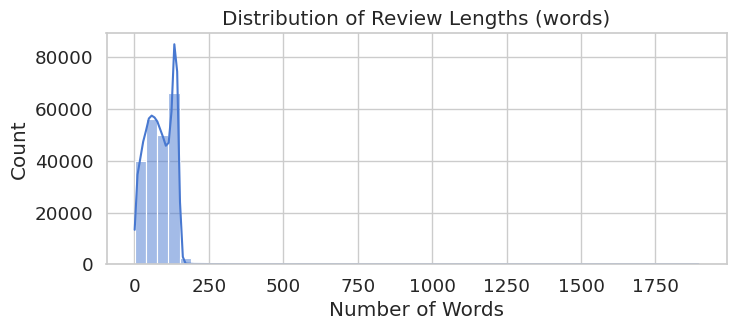

Average review length: 84.68222799830747 44.85253220227915


In [11]:
df["review_length"] = df["review"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,3))
sns.histplot(df["review_length"], bins=50, kde=True)
plt.title("Distribution of Review Lengths (words)")
plt.xlabel("Number of Words")
plt.show()

print("Average review length:", df["review_length"].mean(), df["review_length"].std())

In [12]:
print("Example Positive Review:\n")
print(df[df["sentiment"]=="positive"]["review"].iloc[0])

print("\nExample Negative Review:\n")
print(df[df["sentiment"]=="negative"]["review"].iloc[0])

Example Positive Review:

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"

Example Negative Review:

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.
The positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."


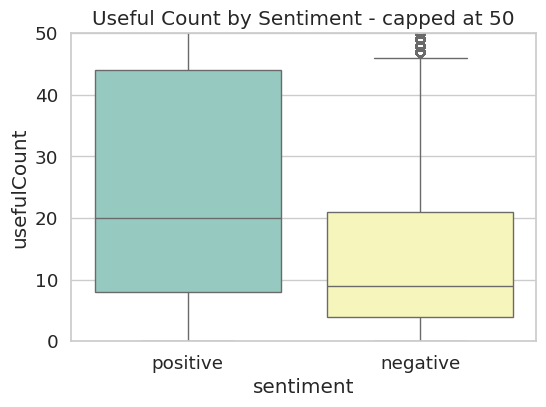

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sentiment", y="usefulCount", data=df, palette="Set3", hue="sentiment", order=["positive", "negative"])
plt.ylim(0, 50)  # cap to reduce outliers effect
plt.title("Useful Count by Sentiment - capped at 50")
plt.show()

### Insights:

**Ratings Distribution:**
The ratings are not evenly distributed; there are more positive ratings (above 5) than negative ones. This suggests a sentiment imbalance in the dataset.

**Sentiment Classes:**
70% of the reviews are classified as "positive" (rating > 5), with fewer "negative" reviews. This class imbalance should be considered in modeling.

**Top Conditions and Drugs:**
A small number of conditions and drugs dominate the dataset. Specially for conditions, birth control dominates the reviews. 

**Review Length:**
Most reviews are relatively short (average 84.6 words ± 44.85), but there is a wide range in review lengths. 

**Useful Count:**
Positive reviews tend to have a higher "usefulCount" on average, but there are outliers. The boxplot (capped at 50) shows that most reviews have a low useful count, with a few being marked as very useful.

**Missing Values:**
There are some missing values in the dataset, but the extent and columns affected should be checked before modeling.